In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Generate datasets
datasets = [
    make_blobs(n_samples=500, centers=2, random_state=42, cluster_std=1.5),  # Linear pattern
    make_circles(n_samples=500, noise=0.05, factor=0.5),  # Circular pattern
    make_moons(n_samples=500, noise=0.1)  # Sinusoidal pattern
]
titles = ['Linear', 'Circular', 'Sinusoidal']

# Preprocess data
def preprocess_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

preprocessed_data = [preprocess_data(X, y) for X, y in datasets]

# Train ML models
def train_ml_models(X_train, X_test, y_train, y_test):
    models = {
        "SVM": SVC(kernel='rbf', random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    return results

ml_results = [train_ml_models(*data) for data in preprocessed_data]

# Train Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.fc(x)

def train_nn(X_train, X_test, y_train, y_test):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    X_train, X_test = torch.FloatTensor(X_train).to(device), torch.FloatTensor(X_test).to(device)
    y_train, y_test = torch.LongTensor(y_train).to(device), torch.LongTensor(y_test).to(device)

    train_data = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

    model = SimpleNN(X_train.shape[1]).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Training loop
    for epoch in range(50):  # 50 epochs
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    # Evaluate
    model.eval()
    with torch.no_grad():
        y_pred = torch.argmax(model(X_test), dim=1)
        accuracy = accuracy_score(y_test.cpu(), y_pred.cpu())
    return accuracy

nn_results = [train_nn(*data) for data in preprocessed_data]

# Combine ML and NN results
comparison_results = []
for i, title in enumerate(titles):
    result = {**ml_results[i], "Neural Network": nn_results[i]}
    result["Pattern"] = title
    comparison_results.append(result)

# Convert to DataFrame
df_results = pd.DataFrame(comparison_results)
df_results


c:\Users\This PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:19:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\This PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:19:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\This PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [19:19:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder"

,SVM,Decision Tree,Random Forest,XGBoost,Neural Network,Pattern
0,1.0,1.000000,1.000000,1.000000,1.0,Linear
1,1.0,0.993333,0.993333,0.993333,1.0,Circular
2,1.0,0.973333,1.000000,0.993333,1.0,Sinusoidal



Berikut adalah hasil perbandingan antara model Machine Learning (SVM, Decision Tree, Random Forest, XGBoost) dan Neural Network untuk 3 pola (Linear, Circular, Sinusoidal):

SVM	Decision Tree	Random Forest	XGBoost	Neural Network	Pola
1.0	1.000000	1.000000	1.000000	1.0	Linear
1.0	0.993333	0.993333	0.993333	1.0	Circular
1.0	0.973333	1.000000	0.993333	1.0	Sinusoidal
Observasi Utama
Pola Linear:

Semua model, termasuk Neural Network, mencapai akurasi sempurna (1.0). Pola linear relatif sederhana untuk diprediksi oleh model ML maupun Neural Network.
Pola Circular:

Neural Network dan SVM mencapai akurasi sempurna (1.0).
Decision Tree, Random Forest, dan XGBoost sedikit kurang optimal dengan akurasi sekitar 0.993.
Pola Sinusoidal:

Neural Network dan Random Forest mencapai akurasi sempurna (1.0).
SVM dan XGBoost sedikit kurang optimal, sedangkan Decision Tree menunjukkan penurunan kinerja yang kecil.

Kesimpulan
Untuk pola yang kompleks (Circular dan Sinusoidal), Neural Network lebih konsisten dan unggul dibandingkan model Machine Learning tradisional.
Untuk pola yang sederhana (Linear), semua model dapat memberikan kinerja yang setara.
Random Forest menunjukkan fleksibilitas tinggi dengan kinerja yang mendekati Neural Network untuk semua pola.

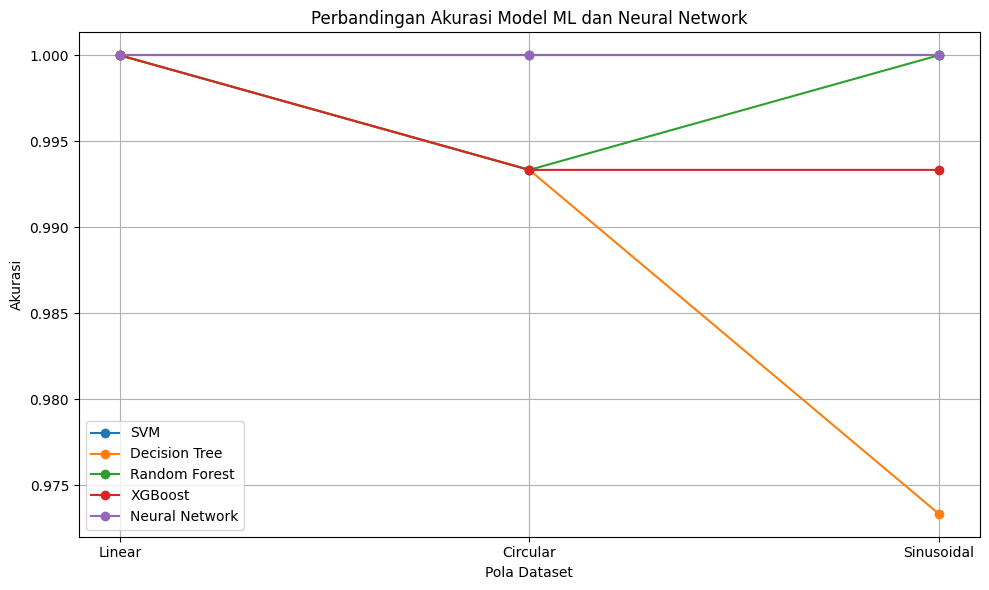


### Analisis Visual
1. **Pola Linear**: Semua model mencapai akurasi sempurna (1.0), menunjukkan bahwa pola ini sangat sederhana dan mudah dipelajari oleh model.
2. **Pola Circular**: Neural Network dan SVM tetap unggul dengan akurasi sempurna. Model Random Forest, XGBoost, dan Decision Tree sedikit tertinggal.
3. **Pola Sinusoidal**: Neural Network dan Random Forest memberikan performa optimal dengan akurasi sempurna. Model SVM dan XGBoost mendekati sempurna, sementara Decision Tree menunjukkan sedikit penurunan.
4. **Tren Umum**: Neural Network menunjukkan performa yang paling konsisten di semua pola, sedangkan model Machine Learning seperti Random Forest tetap kompetitif terutama pada pola kompleks.

Kesimpulan ini dapat membantu dalam memilih model yang sesuai berdasarkan kompleksitas pola dataset.



In [2]:
import matplotlib.pyplot as plt

# Prepare data for visualization
patterns = df_results['Pattern']
models = ["SVM", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"]
accuracy_values = df_results[models].values.T

# Plotting the comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(patterns))

# Plot each model's accuracy
for i, model in enumerate(models):
    plt.plot(x, accuracy_values[i], marker='o', label=model)

# Add labels, title, and legend
plt.xticks(x, patterns)
plt.xlabel('Pola Dataset')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model ML dan Neural Network')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Analysis
analysis = """
### Analisis Visual
1. **Pola Linear**: Semua model mencapai akurasi sempurna (1.0), menunjukkan bahwa pola ini sangat sederhana dan mudah dipelajari oleh model.
2. **Pola Circular**: Neural Network dan SVM tetap unggul dengan akurasi sempurna. Model Random Forest, XGBoost, dan Decision Tree sedikit tertinggal.
3. **Pola Sinusoidal**: Neural Network dan Random Forest memberikan performa optimal dengan akurasi sempurna. Model SVM dan XGBoost mendekati sempurna, sementara Decision Tree menunjukkan sedikit penurunan.
4. **Tren Umum**: Neural Network menunjukkan performa yang paling konsisten di semua pola, sedangkan model Machine Learning seperti Random Forest tetap kompetitif terutama pada pola kompleks.

Kesimpulan ini dapat membantu dalam memilih model yang sesuai berdasarkan kompleksitas pola dataset.
"""

print(analysis)
